In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import plotly as plt

In [2]:
all = pd.read_csv('./melon_chart_all.csv')

In [46]:
all.describe()

,index,year,rank,song_id,album_id,album_score,album_score_count,album_reply,like,reply
count,8500.000000,8500.000000,8500.000000,8.500000e+03,8.500000e+03,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,4249.500000,2018.541176,50.500000,3.037899e+07,9.894233e+06,3.786235,23808.436118,29272.152824,137752.446471,1474.379882
std,2453.882977,0.498331,28.867768,4.700161e+06,1.528327e+06,0.794072,25396.016511,41378.292033,82349.839522,1860.456970
min,0.000000,2018.000000,1.000000,1.477600e+04,8.290000e+02,0.900000,465.000000,101.000000,5253.000000,22.000000
25%,2124.750000,2018.000000,25.750000,3.096253e+07,1.014949e+07,3.600000,5365.000000,2128.000000,76706.000000,390.000000
50%,4249.500000,2019.000000,50.500000,3.130620e+07,1.020396e+07,3.900000,13180.000000,8879.000000,131941.000000,835.000000
75%,6374.250000,2019.000000,75.250000,3.166642e+07,1.026086e+07,4.300000,32042.000000,40199.000000,178502.000000,1875.000000
max,8499.000000,2019.000000,100.000000,3.217594e+07,1.035189e+07,4.900000,121533.000000,262324.000000,440396.000000,12127.000000


## 알수 있는 것
* 8500개의 data
* '앨범 평점'의 5점만점에 평균은 3.78 중앙값은 3.9 (비슷) -> 하위의 곡들을 찾아보자
* '앨범 댓글 수'는 평균적으로 29272번 중앙값은 8879로 볼때 매우 극단적인 분포임을 알수 있음 -> 어떤곡이 상위인지 하위인지 알아보자 ^_^
* '곡 좋아요'평균적으로 137752번 중앙값은 131941번 (비슷) 
* '앨범 좋아요' 는 평균 1474번 중앙값은 835번 극단적인 분포임을 알수 있다 -> 어떤앨범이 상위인지 하위인지 알아보자

In [58]:
all.corr()

,index,year,rank,song_id,album_id,album_score,album_score_count,album_reply,like,reply
index,1.000000,0.863084,0.011764,0.137383,0.113490,-0.056799,-0.168097,-0.193391,-0.186582,-0.040597
year,0.863084,1.000000,0.000000,0.131082,0.109998,-0.050691,-0.147372,-0.173155,-0.145582,-0.018315
rank,0.011764,0.000000,1.000000,-0.056989,-0.058849,0.183930,0.108473,0.057896,-0.199482,-0.110381
song_id,0.137383,0.131082,-0.056989,1.000000,0.976659,-0.047489,0.091627,0.091159,-0.113758,0.080404
album_id,0.113490,0.109998,-0.058849,0.976659,1.000000,-0.050128,0.111398,0.111807,-0.085742,0.098117
album_score,-0.056799,-0.050691,0.183930,-0.047489,-0.050128,1.000000,-0.202275,-0.137428,-0.062278,-0.331228
album_score_count,-0.168097,-0.147372,0.108473,0.091627,0.111398,-0.202275,1.000000,0.826339,0.467847,0.642276
album_reply,-0.193391,-0.173155,0.057896,0.091159,0.111807,-0.137428,0.826339,1.000000,0.478947,0.679723
like,-0.186582,-0.145582,-0.199482,-0.113758,-0.085742,-0.062278,0.467847,0.478947,1.000000,0.600689
reply,-0.040597,-0.018315,-0.110381,0.080404,0.098117,-0.331228,0.642276,0.679723,0.600689,1.000000


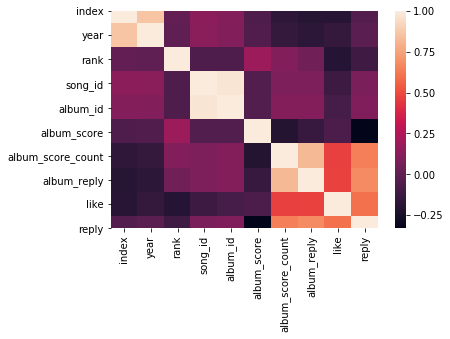

In [59]:
sns.heatmap(all.corr())

# 장르

In [76]:
all.groupby('genre').size().sort_values(ascending = False).head(10)

genre
['발라드']                2387
['댄스']                 1756
['랩/힙합']               1631
['R&B/Soul']            749
['발라드', ' 국내드라마']       485
['POP']                 419
['발라드', ' 인디음악']        188
['인디음악', ' 록/메탈']       173
['록/메탈']                169
['인디음악', ' 포크/블루스']     136
dtype: int64

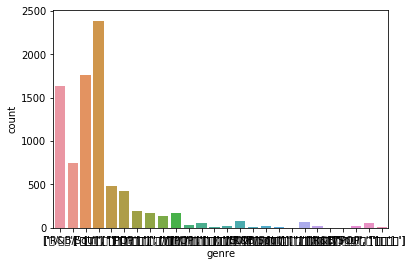

In [75]:
sns.countplot(x="genre", data=all)

In [82]:
sns.catplot( x='album_score', y='like',data = 'all' ,kind ='scatter', hue ='genre')

ValueError: Plot kind 'scatter' is not recognized

# 앨범 평점

## 1.앨범평점의 분포

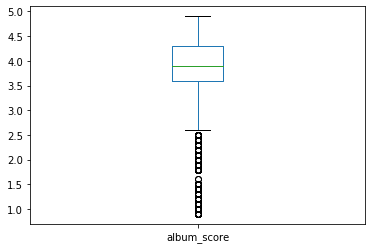

In [50]:
all['album_score'].plot(kind='box')

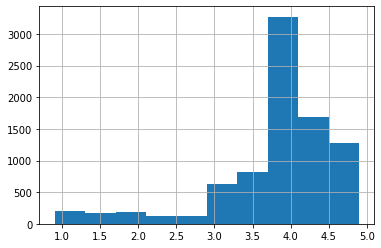

In [51]:
all['album_score'].hist()

In [52]:
low_score = all[all['album_score'] < 1.5]

In [53]:
low_score['album_score'].value_counts()

1.4    105
1.0     87
1.1     65
0.9     30
1.2     23
1.3     15
Name: album_score, dtype: int64

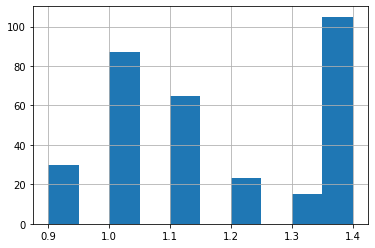

In [54]:
low_score['album_score'].hist()

### 평점이 낮은 곡들은 이런친구들

In [55]:
low_score.groupby('title').size().sort_values(ascending = False)

title
지나오다                               70
Way Back Home                      69
넋두리                                35
이 노래가 클럽에서 나온다면                    30
내 안부                               18
대충 입고 나와                           17
알았다면                               16
비행운                                14
미운 날                               12
조금 취했어 (Prod. 2soo)                 8
지각                                  6
있어줘요                                6
이별행동                                6
시작됐나, 봄                             5
사랑에 연습이 있었다면 (답가)                   5
스무살이 왜이리 능글맞아 (Feat. 숀 (SHAUN))     4
혼코노 (Honkono)                       4
dtype: int64

In [56]:
low_score.groupby('title').mean().sort_values(by='album_score',ascending=True)

,index,year,rank,song_id,album_id,album_score,album_score_count,album_reply,like,reply
title,,,,,,,,,,
이 노래가 클럽에서 나온다면,5786.133333,2019.000000,37.133333,31576009.0,10245121.0,0.9,43561.0,32450.0,111849.0,3414.0
대충 입고 나와,6849.294118,2019.000000,50.294118,31835421.0,10291606.0,1.0,10500.0,2860.0,43848.0,337.0
지나오다,3482.842857,2018.442857,33.842857,30699142.0,10106853.0,1.0,92899.0,120742.0,216379.0,9616.0
미운 날,5305.750000,2019.000000,56.750000,31629490.0,10254316.0,1.1,18499.0,6249.0,37485.0,856.0
조금 취했어 (Prod. 2soo),8054.375000,2019.000000,5.375000,32059630.0,10331499.0,1.1,19859.0,11555.0,73970.0,1351.0
있어줘요,8157.500000,2019.000000,8.500000,32085144.0,10336518.0,1.1,15613.0,4357.0,51733.0,361.0
스무살이 왜이리 능글맞아 (Feat. 숀 (SHAUN)),2229.500000,2018.000000,80.500000,31257764.0,10196005.0,1.1,12615.0,4743.0,30702.0,615.0
넋두리,1742.400000,2018.000000,43.400000,9642570.0,2710553.0,1.1,15441.0,1649.0,103605.0,430.0
내 안부,7599.055556,2019.000000,50.055556,31929663.0,10307772.0,1.2,4970.0,1063.0,47818.0,178.0


## 2.앨범평점과 앨범좋아요 수의 연관성및 분포

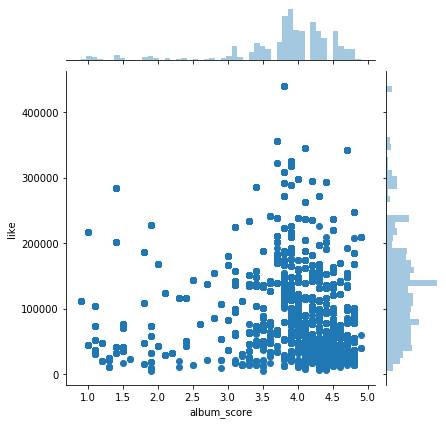

In [57]:
#조인트플롯
sns.jointplot(data = all, x='album_score', y='like')

# 앨범댓글수의 분포

## 1.앨범댓글수의 분포

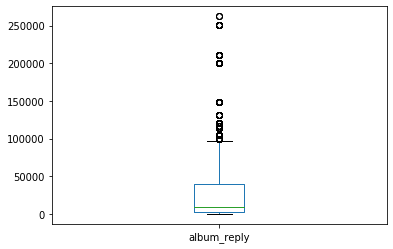

In [3]:
all['album_reply'].plot(kind='box')

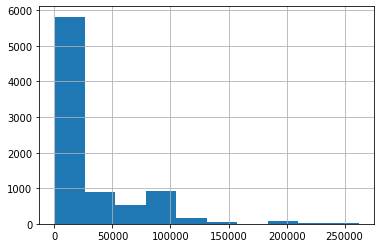

In [4]:
all['album_reply'].hist()

### 그렇다면 댓글이 엄청많이 나오는 노래를 알아보자

In [22]:
댓글부자 = all[all['album_reply']>80000]

* 83개의 곡이 댓글부자로 선정되었고 1위는 코코밥,2위는 여름여름해 였다
* 팬들이 많은 곡들(사재기가 아닐거같은)이 다수있었다
* 그렇다면 평점은낮은데 댓글이 많은걸 알아보면 사재기를 알수 있지않을까?

In [23]:
댓글부자.groupby('title').mean().sort_values(by='album_reply',ascending = False)

,index,year,rank,song_id,album_id,album_score,album_score_count,album_reply,like,reply
title,,,,,,,,,,
Ko Ko Bop,263.666667,2018.000000,98.000000,30529996.0,10080589.0,3.7,121533.0,262324.0,322208.0,6797.0
여름여름해 (Sunny Summer),2042.727273,2018.000000,43.727273,31196764.0,10186691.0,3.6,11206.0,251167.0,56148.0,939.0
밤 (Time for the moon night),1728.814815,2018.000000,29.814815,31052421.0,10163106.0,3.6,20589.0,210444.0,141500.0,3571.0
봄날,4246.470588,2018.541176,47.470588,30244931.0,10037969.0,3.8,89222.0,200250.0,440396.0,7133.0
DNA,2698.722222,2018.277778,49.722222,30637982.0,10097112.0,3.7,94678.0,148901.0,355861.0,5872.0
고민보다 Go,389.285714,2018.000000,90.285714,30637988.0,10097112.0,3.7,94678.0,148901.0,201204.0,1066.0
MIC Drop,98.000000,2018.000000,99.000000,30637987.0,10097112.0,3.7,94678.0,148901.0,192565.0,1128.0
해야 (Sunrise),4640.727273,2019.000000,41.727273,31556500.0,10242169.0,3.9,11461.0,131165.0,59144.0,1658.0
지나오다,3482.842857,2018.442857,33.842857,30699142.0,10106853.0,1.0,92899.0,120742.0,216379.0,9616.0


## 2.앨범 댓글수와 평점의 연관성 및 분포 

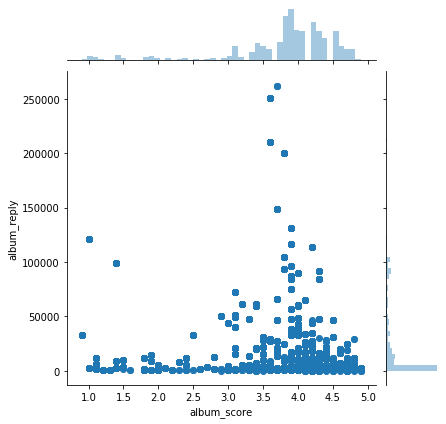

In [27]:
#조인트플롯
sns.jointplot(data = all, x='album_score', y='album_reply')

### 평점은 낮은데 댓글은 9만이상인건 누구지 대체



In [28]:
십만 = all['album_reply']>90000
낮은평점 = all['album_score'] < 2

In [29]:
all[십만 & 낮은평점].groupby('title').size()

title
Way Back Home    69
지나오다             70
dtype: int64

# 앨범 좋아요

## 1. 분포

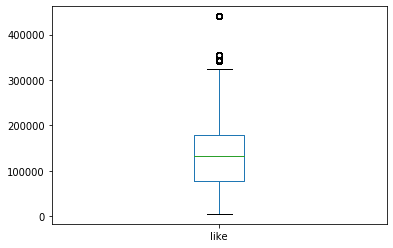

In [32]:
all['like'].plot(kind='box')

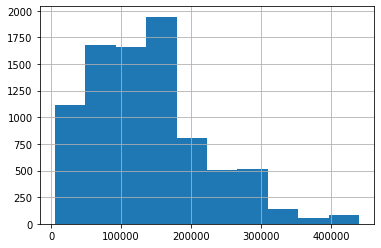

In [33]:
all['like'].hist()

### 좋아요수가 많은 곡들은 대체로 인기가 많고 팬들도 많은 그런 곡인가보다

In [35]:
좋아요 =all[all['like']>300000]

In [37]:
좋아요.groupby('title').size().sort_values(ascending = False)

title
봄날                                         85
모든 날, 모든 순간 (Every day, Every Moment)      85
밤편지                                        66
DNA                                        54
작은 것들을 위한 시 (Boy With Luv) feat. Halsey    32
좋니                                         26
벚꽃 엔딩                                      12
Ko Ko Bop                                   3
dtype: int64

## 2. 평점과 좋아요수의 관계

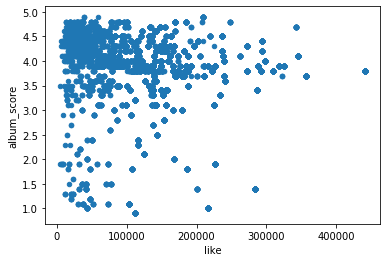

In [40]:
all.plot(kind = 'scatter',x='like', y='album_score')

In [43]:
all.corr().loc['like','album_score']

-0.06227823744783701

* 어후 이건쓰면 안되겠다

### (1) 좋아요가 많은 친구들은 대체로 평점도 좋네~

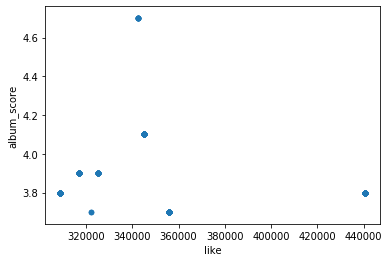

In [38]:
좋아요.plot(kind = 'scatter',x='like', y='album_score')

## (2)그렇담 좋아요가 적은 친구들은!?

In [101]:
#좋아요수가 2만개 아래인수를 그냥그래로 저장
그냥그래 = all[all['like']<20000]

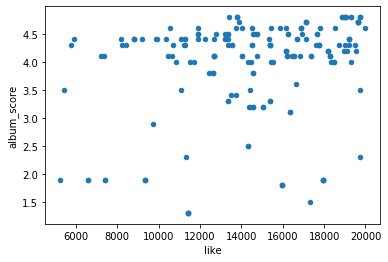

In [100]:
그냥그래.plot(kind = 'scatter',x='like', y='album_score')

## 그럼 평점이 높은 친구(노관심), 평점이 낮은친구를 나누어 보자

### (2)-1 좋아요 2만아래 평점은 3.5이상

In [122]:
노관심 = 그냥그래[그냥그래['album_score']>3.5]

In [126]:
노관심.groupby('genre').size().sort_values(ascending=False)

genre
['발라드']                   52
['R&B/Soul']              24
['랩/힙합']                  20
['록/메탈']                  18
['댄스']                    10
['발라드', ' 국내드라마']          7
['인디음악', ' 록/메탈']          6
['발라드', ' 인디음악']           5
['인디음악', ' 포크/블루스']        4
['포크/블루스']                 2
['R&B/Soul', ' 인디음악']      1
['R&B/Soul', ' 국내드라마']     1
dtype: int64

In [129]:
노관심.groupby('rank').size().sort_values(ascending=False)

rank
95     9
93     8
92     7
100    6
87     6
88     6
89     6
86     6
98     6
85     5
91     5
99     5
90     4
74     4
97     4
72     4
84     4
83     4
69     4
94     3
78     3
75     3
64     3
68     3
80     3
65     2
63     2
71     2
81     2
44     2
79     2
82     2
51     1
52     1
53     1
59     1
43     1
58     1
77     1
61     1
62     1
66     1
70     1
73     1
76     1
96     1
39     1
dtype: int64

### 평점이 높은 친구들은 노래는 좋은데 관심있는 사람들이 적은 ㅠㅠ

## 근데 평점이 낮은친구들은 뭘까! 이거이거 뭔가 냄새가 나는데 -_-

### (2)-2 좋아요 2만아래 평점은 2아래

In [110]:
그냥그래.head(0)

,index,year,month,week,rank,song_id,title,artist,album,genre,album_id,album_score,album_score_count,album_reply,artist_id,fan,like,reply


In [117]:
#그냥그래중 평점이 낮은애들만 한번봐보자
그냥그래[그냥그래['album_score']<2].groupby('title').mean()

,index,year,rank,song_id,album_id,album_score,album_score_count,album_reply,like,reply
title,,,,,,,,,,
그 날의 온도,2882.000000,2018.0,83.000000,31356460.0,10212204.0,1.5,4087.0,1973.0,17343.0,167.0
내 생애 가장 행복한 시간 Part.2 (Feat. 양다일),8290.250000,2019.0,41.250000,32128107.0,10344095.0,1.9,36488.0,14728.0,17948.0,293.0
무인도 (Feat. MOON),8329.000000,2019.0,80.000000,32128106.0,10344095.0,1.9,36488.0,14728.0,7421.0,108.0
알아 (Feat. HYNN(박혜원)),8282.000000,2019.0,83.000000,32128109.0,10344095.0,1.9,36488.0,14728.0,5253.0,67.0
온도 (Feat. 수란),8373.333333,2019.0,74.333333,32128108.0,10344095.0,1.9,36488.0,14728.0,9366.0,123.0
전화를 할까봐,8069.000000,2019.0,70.000000,32080241.0,10335546.0,1.8,3398.0,624.0,15980.0,97.0
"존버 (Feat. Coogie, Jiselle)",8339.000000,2019.0,90.000000,32128110.0,10344095.0,1.9,36488.0,14728.0,6605.0,141.0
혼코노 (Honkono),8239.250000,2019.0,90.250000,32104350.0,10340024.0,1.3,3422.0,587.0,11407.0,96.0
